# TMDB Movies Data Analysis

### Question(s) for Analysis
#### Q1: Whice movies have most popularity?
#### Q2: Which movies have large profit?
#### Q3: Which year have most release movies?
#### Q4: Which genres are most trends cross the years?
#### Q5: There are a correlation between budget and revenue?

##### import the nesseray library [pandas,numpy, matplotlib]
##### load dataset from CSV file into dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_movie = pd.read_csv('tmdb-movies.csv')

##### show sample of data

In [2]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Get some information about Dataset [n.column, n.record, datatype]

In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Dataset have 10866 records and 21 columns

###### Find number of Duplicated value

In [4]:
df_movie.duplicated().sum()

1

###### Drop duplicated row

In [5]:
df_movie.drop_duplicates(inplace=True)

##### Drop columns in Dataset that will not affected on our questions mentioned above and insights

In [6]:
df_movie.drop(['homepage','tagline','production_companies','keywords'], axis=1, inplace=True)

##### Find the null value in Dataset

In [7]:
df_movie.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

##### Drop null value form Dataset

In [8]:
df_movie.dropna(inplace=True)

##### Check the Dataset after drop duplicated rows, null value and unnecessary columns

In [9]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10724 non-null  int64  
 1   imdb_id         10724 non-null  object 
 2   popularity      10724 non-null  float64
 3   budget          10724 non-null  int64  
 4   revenue         10724 non-null  int64  
 5   original_title  10724 non-null  object 
 6   cast            10724 non-null  object 
 7   director        10724 non-null  object 
 8   overview        10724 non-null  object 
 9   runtime         10724 non-null  int64  
 10  genres          10724 non-null  object 
 11  release_date    10724 non-null  object 
 12  vote_count      10724 non-null  int64  
 13  vote_average    10724 non-null  float64
 14  release_year    10724 non-null  int64  
 15  budget_adj      10724 non-null  float64
 16  revenue_adj     10724 non-null  float64
dtypes: float64(4), int64(6), object

### Q1: Which movies have most popularity?

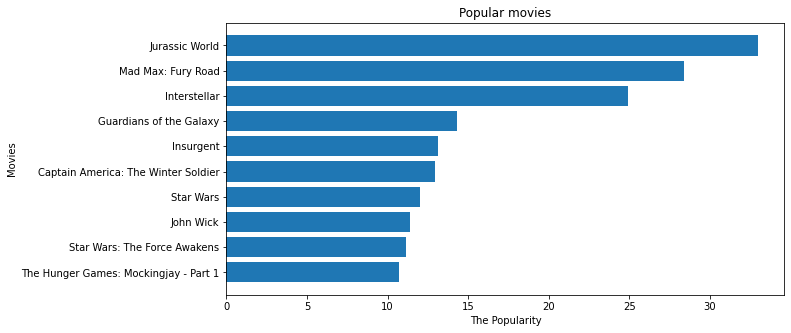

In [10]:
sorted_movies = df_movie.sort_values(by='popularity', ascending=False)
title = sorted_movies.original_title[:10]

plt.subplots(figsize=(10,5))
plt.gca().invert_yaxis()
plt.title('Popular movies')
plt.ylabel('Movies')
plt.xlabel("The Popularity")
plt.barh(title, sorted_movies['popularity'].head(10));

The plot above give us a visulaize about Which movies have most popularity:
- "Jurassic World" then "Mad Max" and "Fury Road"

### Q2: Which movies have large profit?

#### budget column has values in some records equel zero
#### So, we replace the 0s values with mean to get approximiate value

In [11]:
df_movie['budget'].replace(0,df_movie['budget'].mean(), inplace=True)

In [12]:
# check there are no 0s values in budget column : should'nt return any records
df_movie[df_movie['budget'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


##### Calculate the profit: profit = revenue - budget

In [13]:
df_movie['profit'] = df_movie['revenue'] - df_movie['budget']

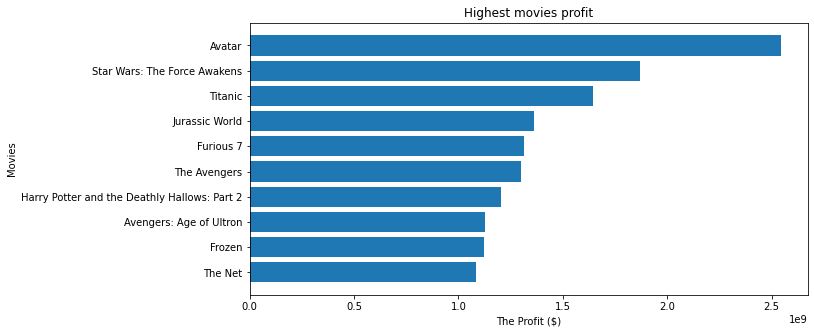

In [14]:
sorted_movies_pr = df_movie.sort_values(by='profit', ascending=False)

plt.subplots(figsize=(10,5))
plt.gca().invert_yaxis()
plt.title('Highest movies profit')
plt.ylabel('Movies')
plt.xlabel("The Profit ($)")
plt.barh(sorted_movies_pr.original_title.head(10), sorted_movies_pr.profit.head(10));

The plot above give us a visulaize about which movies have large profit:
- "Avatar" then "Star Wars" and "The Force Awakens"

### Q3: Which year have most release movies?

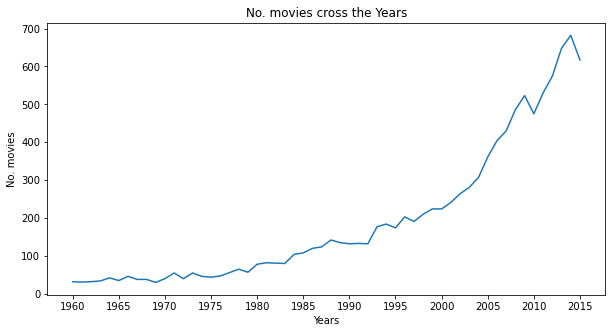

In [15]:
df = df_movie.groupby('release_year')['original_title'].count()
plt.subplots(figsize=(10,5))
df.plot()
plt.title('No. movies cross the Years')
plt.ylabel('No. movies')
plt.xlabel('Years')
plt.xticks(range(1960,2016,5));

The plot above give us a visulaize about Which year have most release movies cross the years:
- 2014:(682), 2013:(648) and 2015:(617)

### Q4: Which genres are most trends cross the years?

Text(0.5, 1.0, 'Genres are most trend')

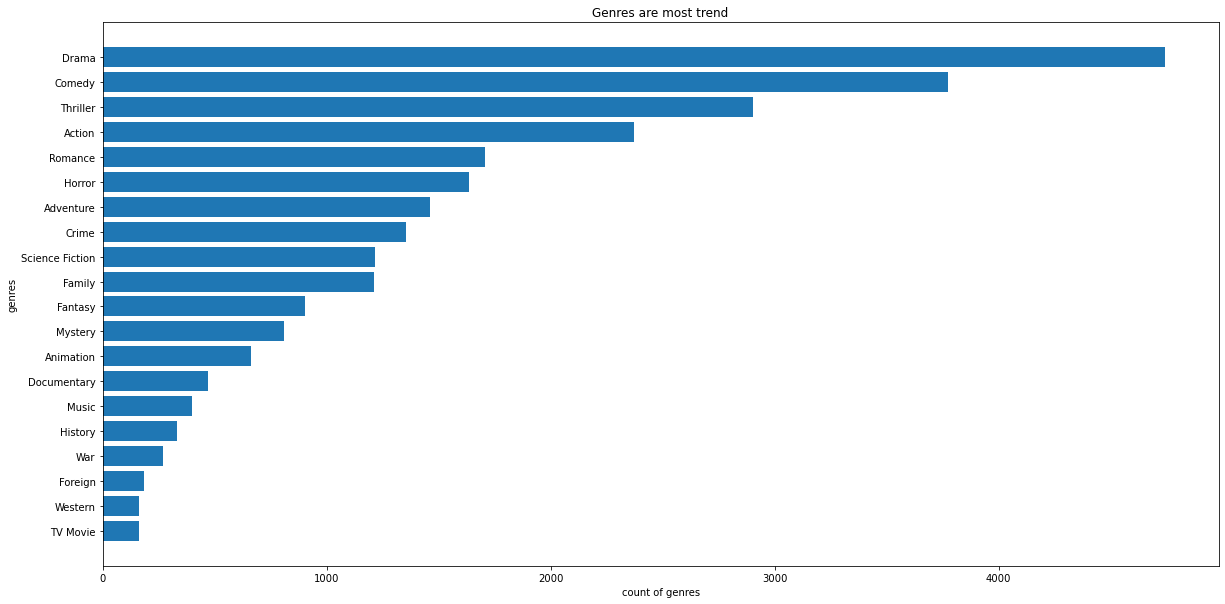

In [16]:
l=[]

for c in df_movie['genres'].str.split("|"):
    for k in range(len(c)):
        l.append(c[k])
uni_list = list(set(l))

kind,cou = [],[]
for uni in uni_list:
    kind.append(uni)
    cou.append(l.count(uni))
    
df = pd.DataFrame(zip(kind,cou),columns=['kind','cou'])
df.sort_values(by='cou', ascending=True, inplace=True)

plt.subplots(figsize=(20,10))

plt.barh(df['kind'],df['cou']);
plt.ylabel('genres')
plt.xlabel('count of genres')
plt.title('Genres are most trend')

After visulaization the analysiz we can finding "Which genres are most trends cross the years (1960-2015)?"
- Drama is the most genres trends more than 4000 times, then Comedy about 4000 times and then Thriller about 3000 times

### Q5: There are a correlation between budget and revenue?

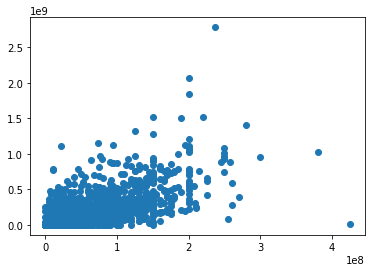

In [29]:
plt.scatter(df_movie['budget'],df_movie['revenue']);

The plot above show there are a correlation skewed to right that means The higher the budget, the higher the revenue

## Conclusion

#### Limitations
During the exploration of dataset there are some limitations in the dataset:
- in Budget column there are many 0s values and this not acceptable (movies with no Budget! How!!?), So we can replace it with mean of Budget all the specific years and this may affected un accurate insights
- Drop null value will affected on insights 
- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed

After making this analysis about TMDB movies dataset and Wrangling data and do exploratary we can summery this report into following points:
- The most popular movies is "Jurassic World" then Mad Max: Fury Road 
- The highest movies profit is "Avatar" then "Star Wars: The Force Awakens"
- The most years have release movies is 2014:(682), 2013:(648) and 2015:(617)
- The most genres trends cross the year is Drama, Comedy and Thriller
- The correlation between budget and revenue skewed to right that means The higher the budget, the higher the revenue